In [36]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import dash
import datetime as dt
from matplotlib.colors import ListedColormap
lr = LinearRegression()
from dash import dcc
from dash import html
from itertools import chain
from collections import Counter
from dash.dependencies import Input, Output
from sklearn.pipeline import make_pipeline

import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error

In [2]:
#dfd = pd.read_csv("CSVs\dfdd.csv")
#dfd.index = dfd['Unnamed: 0'].values
#del dfd['Unnamed: 0']

#dfc = pd.read_csv("CSVs\dfcc.csv")
#dfc.index = dfc['Unnamed: 0'].values
#del dfc['Unnamed: 0']

In [3]:
dfc = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfc.csv')
dfc.index = dfc['Unnamed: 0'].values
del dfc['Unnamed: 0']

dfd = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfd.csv')
dfd.index = dfd['Unnamed: 0'].values
del dfd['Unnamed: 0']

dfdsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfdsr.csv')
dfdsr.index = dfdsr['Unnamed: 0'].values
del dfdsr['Unnamed: 0']

dfcsr = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/newdfcsr.csv')
dfcsr.index = dfcsr['Unnamed: 0'].values
del dfcsr['Unnamed: 0']

delta = pd.read_csv('https://raw.githubusercontent.com/ZelshaR/Project/main/NoteBooks/CSVs/delta.csv')
delta.index = delta['Unnamed: 0'].values
del delta['Unnamed: 0']

In [4]:
#corlist = dfc.columns
#dfcsr = dfc.copy(deep=True)
#dfdsr = dfd.copy(deep=True)
#for i in corlist:
#    for j in range(706):
#        dfcsr[i].iloc[j] = (dfcsr[i].iloc[j]-min(dfcsr[i]))/(max(dfcsr[i])-min(dfcsr[i]))
#for i in corlist:
#    for j in range(706):
#        dfdsr[i].iloc[j] = (dfdsr[i].iloc[j]-min(dfdsr[i]))/(max(dfdsr[i])-min(dfdsr[i]))

In [5]:
#dfcsr.drop(dfcsr.head(10).index,inplace=True)
#dfcsr.drop(dfcsr.tail(10).index,inplace=True)

In [6]:
delta = delta.fillna(0)

In [7]:
a = np.concatenate((dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values), axis = 0)
#yaxis = a.reshape(6,706)

In [8]:
yaxis = delta['Russia'].values
xaxis = [i for i in range(1,len(delta) + 1)]

In [9]:
#lol

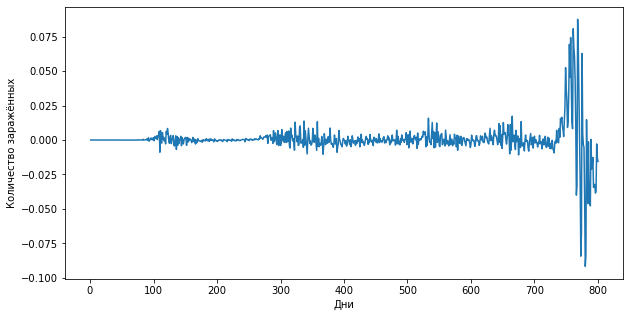

In [10]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis)
plt.xlabel('Дни')
plt.ylabel('Количество заражённых')
plt.show()

In [11]:
dfc['Russia']

1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
        ...   
798    57787.0
799    50284.0
800    49710.0
801    47096.0
802    43951.0
Name: Russia, Length: 800, dtype: float64

In [12]:
xaxis1 = np.reshape(xaxis, (-1, 1))
lr.fit(xaxis1, yaxis)

LinearRegression()

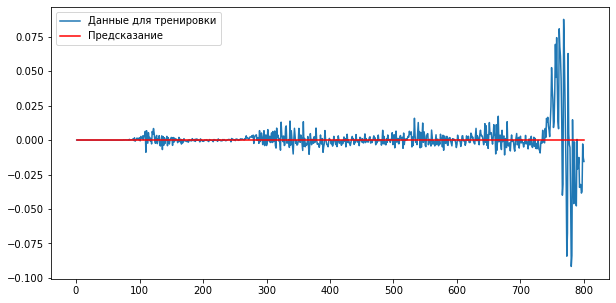

In [13]:
plt.figure(figsize=(10,5))
plt.plot(xaxis, yaxis, label='Данные для тренировки')
plt.plot(xaxis,lr.predict(xaxis1), label='Предсказание', c='red')
plt.legend()
plt.show()

In [14]:
xaxis_

NameError: name 'xaxis_' is not defined

In [15]:
g = np.reshape(delta.index, (-1, 1))

In [16]:
cd.index

NameError: name 'cd' is not defined

In [17]:
dfcsr[['Russia', 'United Kingdom', 'Belarus', 'Georgia', 'Europe']]

,Russia,United Kingdom,Belarus,Georgia,Europe
1,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
798,0.285776,0.311815,0.138774,0.032865,0.453467
799,0.248671,0.384883,0.167806,0.074848,0.451312
800,0.245832,0.332245,0.212869,0.058625,0.435034
801,0.232905,0.000000,0.216456,0.047226,0.237018


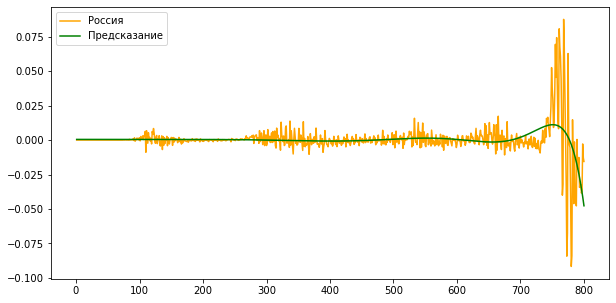

[[ 0.00000000e+00  1.39389809e-26  6.61438528e-32  6.02021042e-37
  -4.06057969e-37 -1.58127068e-34 -4.89399440e-32 -1.30905298e-29
  -2.74871823e-27 -3.49568073e-25  2.24438189e-27 -5.34983052e-30
   5.61380330e-33 -2.18901206e-36]]
[0.00045685]


In [42]:
rmses = []
#enumerate = [i for i in range(10)]
enumerate = [13]

for i in enumerate:
    p = PolynomialFeatures(i, include_bias=True)
    
    xaxis_poly = p.fit_transform(g)

    lr.fit(xaxis_poly, delta[['Russia']])

    xaxis_ = np.linspace(g.min(0), g.max(0), len(delta)).reshape(len(delta),1)
    y_pred_lr = lr.predict(p.transform(xaxis_))
    poly_mse = mean_squared_error(delta[['Russia']], y_pred_lr)
    poly_rmse = np.sqrt(poly_mse)
    rmses.append(poly_rmse)
    plt.figure(figsize=(10,5))
#    plt.scatter(xaxis, yaxis, label='Данные для тренировки') #не вижу смысла проставлять точки, ибо они просто будут накладываться на кривую
    plt.plot(xaxis, yaxis, label='Россия', c='orange')
    plt.plot(xaxis, y_pred_lr, label='Предсказание', c='green')
#    plt.plot(xaxis, dfcsr['United Kingdom'].values, label='Англия', c='red')
#    plt.plot
#    plt.plot
#    plt.plot
#    plt.plot
    plt.legend()
    plt.show()
    #print(p.fit_transform(xaxis_))
    modelo = make_pipeline(p, lr)
    print(modelo.steps[1][1].coef_)
    print(modelo.steps[1][1].intercept_)
rmses

trace1 = go.Scatter(
    x=xaxis,
    y=yaxis,
    name='True',
    yaxis='y2'
)
trace2 = go.Scatter(
    x=xaxis,
    y=list(y_pred_lr),
    name='Предсказание',
    yaxis='y2'
)
fig5 = make_subplots(specs=[[{"secondary_y": True}]])
fig5.add_trace(trace1)
fig5.add_trace(trace2, secondary_y=True)

In [19]:
print(modelo)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=13)),
                ('linearregression', LinearRegression())])


In [20]:
167653 * 0.04

6706.12

In [21]:
x = 799
a = 0
for i in range (1,14):
    a = ((x ** (i)) * modelo.steps[1][1].coef_[0, i]) + a 
a = a + modelo.steps[1][1].intercept_
print(a)

[-0.03802051]


In [22]:
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

[-7688.16540763]


In [23]:
dfc['Russia'].iloc[799] -7688

36263.0

In [24]:
dfc['Russia'].iloc[799]

43951.0

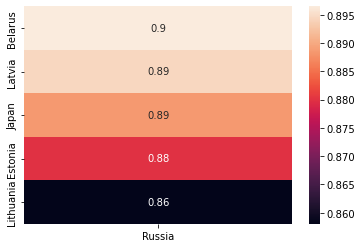

In [25]:
lisc = list(dfcsr.columns)
inp='Russia' #Afghanistan
inpcol=lisc.index(inp)
c = dfcsr.corr()
cd=c.iloc[:,[inpcol]]
cd=cd.sort_values(by=inp,ascending=False)
cd=cd[1:6]
sns.heatmap(cd,annot=True) # vmin=0,vmax=1
plt.show()

In [26]:
cd

,Russia
Belarus,0.896503
Latvia,0.894512
Japan,0.888507
Estonia,0.879866
Lithuania,0.858039


In [27]:
y = dfcsr['Russia'].values
Val = [dfcsr['United Kingdom'].values, dfcsr['Georgia'].values, dfcsr['Belarus'].values, dfcsr['Lithuania'].values, dfcsr['Europe'].values]

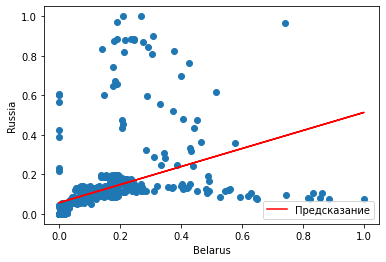

In [28]:
for i in range(1):
    x1p = np.reshape(Val[i], (-1, 1))
    lr.fit(x1p, y)
    plt.scatter(Val[i], y)
    plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
    plt.xlabel(cd.index[i])
    plt.ylabel('Russia')
    plt.legend()
    plt.show()

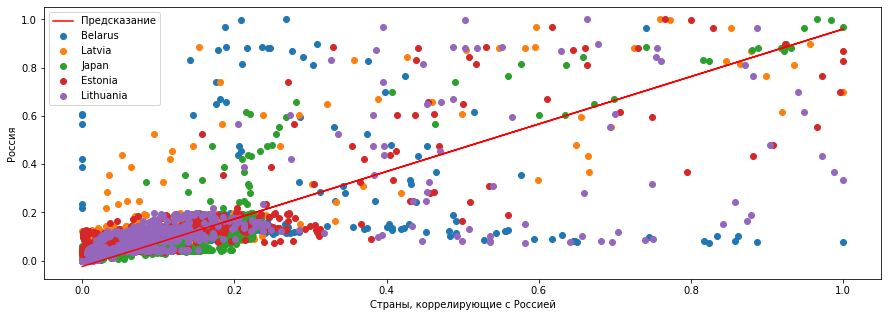

[0.98378558]
-0.023947727990282275


In [29]:
x1p = np.reshape(Val[2], (-1, 1))
lr.fit(x1p, y)
plt.figure(figsize=(15,5))
plt.scatter(Val[0], y, label=cd.index[0])
plt.scatter(Val[1], y, label=cd.index[1])
plt.scatter(Val[2], y, label=cd.index[2])
plt.scatter(Val[3], y, label=cd.index[3])
plt.scatter(Val[4], y, label=cd.index[4])
plt.plot(x1p,lr.predict(x1p), label='Предсказание', c='red')
plt.xlabel('Страны, коррелирующие с Россией')
plt.ylabel('Россия')
plt.legend()
plt.show()
print(modelo.steps[1][1].coef_)
print(modelo.steps[1][1].intercept_)

In [30]:
x = 1
a = modelo.steps[1][1].intercept_ + modelo.steps[1][1].coef_ * x
print(a)

[0.95983785]


In [31]:
a = a * (max(dfc['Russia']) - min(dfc['Russia'])) + min(dfc['Russia'])
print(a)

[194089.77184586]


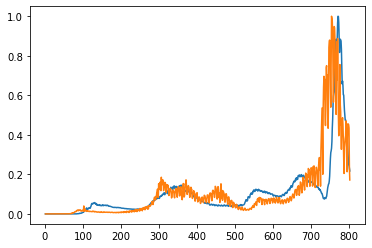

In [32]:
plt.plot(dfcsr['Russia'])
plt.plot(dfcsr['Europe'])
plt.show()

In [33]:
#xaxiss = np.reshape(xaxis, (-1, 1))
model = lr.fit(np.reshape(dfcsr.index, (-1, 1)), dfcsr[['Russia', 'United Kingdom']])

In [88]:
r_sq = model.score(xaxiss, a.reshape(706,5))
print('coefficient of determination:', r_sq)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

coefficient of determination: 0.018417095498703007
intercept: [0.19477753 0.19374956 0.19098423 0.1950648  0.19272552]
slope: [[0.00017815]
 [0.00017999]
 [0.00018726]
 [0.00017863]
 [0.00018255]]


In [90]:
y_pred = model.predict(xaxiss)
print('predicted response:', y_pred, sep='\n')

predicted response:
[[0.19495567 0.19392955 0.19117148 0.19524344 0.19290807]
 [0.19513382 0.19410955 0.19135874 0.19542207 0.19309063]
 [0.19531197 0.19428954 0.191546   0.1956007  0.19327318]
 ...
 [0.32019391 0.32046602 0.32281395 0.32082187 0.32124248]
 [0.32037206 0.32064601 0.32300121 0.3210005  0.32142504]
 [0.32055021 0.32082601 0.32318847 0.32117913 0.32160759]]


In [92]:
y_pred = model.intercept_ + np.sum(model.coef_ * xaxiss, axis=1)

ValueError: operands could not be broadcast together with shapes (5,1) (706,1) 